In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading the file

In [35]:
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Checking duplicated values

In [38]:
df.duplicated().sum()

220

In [39]:
df.shape

(10683, 11)

# Removing duplicate values

In [41]:
df.drop_duplicates(keep = 'last' , inplace = True)

In [42]:
df.shape

(10463, 11)

# Lets also check if any white spaces, NA and '-' exist in our dataset because there existence changes the datatype of numerica column to object

In [44]:
df.isin([' ','NA','-']).sum().any()

False

# Checking null values

In [46]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# Replacing values in Total_Stops column with integers using lambda function

In [48]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [49]:
df['Total_Stops'] = df['Total_Stops'].apply(lambda x:0 if x=='non-stop' else
                                            1 if x=='1 stop' else
                                            2 if x=='2 stops' else
                                            3 if x=='3 stops' else
                                            4 if x=='4 stops' else
                                            x)
# alternative----- df['Total_Stops']=df['Total_Stops'].replace(['non-stop','1 stop','2 stops','3 stops','4 stops'], [0,1,2,3,4])

# now filling null values in Total_Stops column using mode. We can also drop the row having null value as it is only one but for now I am filling it with mode

In [51]:
df['Total_Stops'].fillna(df['Total_Stops'].mode()[0] , inplace = True)

# Lets deal with Route column's null value by replacing it with "Unknown".

In [53]:

df['Route'].fillna('Unknown' , inplace = True)

# Lets do some feature engineering now by creating some new columns from Date of Journey column

In [55]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,13302


In [56]:
df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey).dt.day
df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey).dt.month

# dropping the date of journey column as it is of no use now

In [58]:
df.drop('Date_of_Journey', axis = 1, inplace = True)

# Now extracting hours and min from Dep_Time column

In [60]:

df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Min'] = pd.to_datetime(df['Dep_Time']).dt.minute
df.drop(['Dep_Time'], axis = 1 , inplace = True)

# Same for Arrival Time column

In [62]:

df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Min'] = pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop(['Arrival_Time'], axis = 1, inplace = True)



 # I want values in duration column in minutes instead of hours + min for eg.2h 50 min in 2*60+50m = 170

In [64]:
df['Duration'] = df['Duration'].str.replace('h','*60').str.replace(' ', '+').str.replace('m','*1').apply(eval)

# now i am converting this column into integer

In [66]:
df['Duration'] = df['Duration'].astype(int)

# Now separating numerical and categorical columns

In [68]:
Numerical = df.select_dtypes(exclude = 'object')
Categorical = df.select_dtypes(include = 'object')

# Lets find out value counts of each column in categorical using loop function as it will be lengthy to calculate one by one

In [70]:
for i in Categorical:
    print('Unique value counts of', i , 'enlisted as below table:')
    print('-'*40)
    print(df[i].value_counts())
    print('*'*120)


Unique value counts of Airline enlisted as below table:
----------------------------------------
Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
************************************************************************************************************************
Unique value counts of Source enlisted as below table:
----------------------------------------
Source
Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64
******************************

In [71]:
# Here new delhi and delhi and No info and No Info is showing separate value counts I am replacing them
df['Destination'] = df['Destination'].replace('New Delhi', 'Delhi')
df['Additional_Info'] = df['Additional_Info'].replace('No info','No Info')

In [72]:
df['Destination'].value_counts()

Destination
Cochin       4346
Banglore     2860
Delhi        2179
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [73]:
df['Additional_Info'].value_counts()

Additional_Info
No Info                         8186
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [74]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,170,0.0,No Info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2.0,No Info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2.0,No Info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1.0,No Info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,285,1.0,No Info,13302,1,3,16,50,21,35


# Now lets move to visualization part------ starting with showing outliers if any in the dataset

<Axes: ylabel='Duration'>

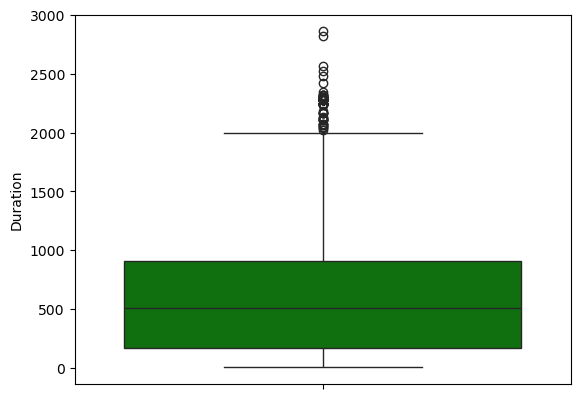

In [76]:
sns.boxplot(df['Duration'] , color = 'g')

# instead of creating one by one boxplot lets use loops and create all the boxplot in a single code

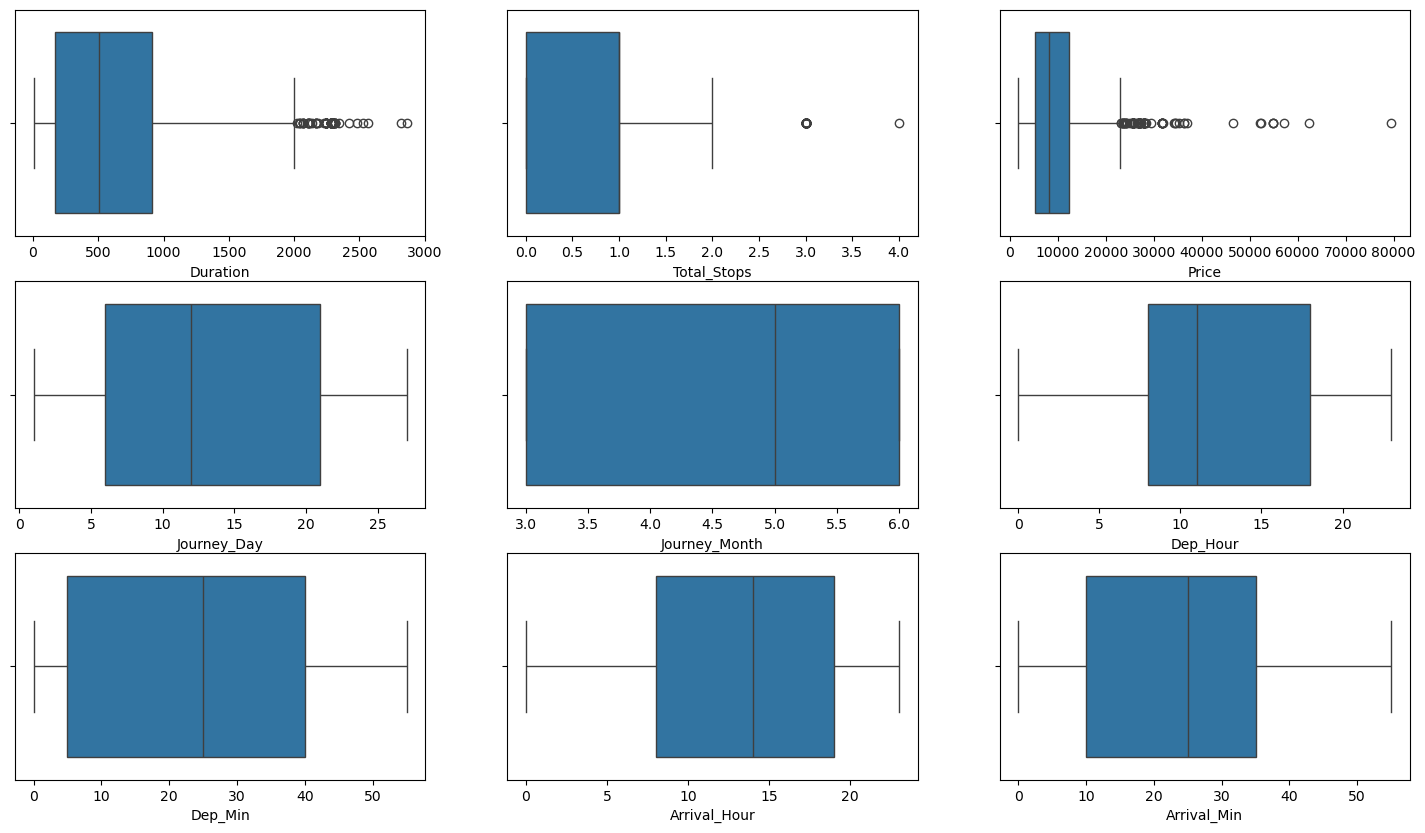

In [78]:
plt.figure(figsize=(18,10), facecolor = 'white')
plotnumber = 1

for i in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(x=df[i])
        plt.xlabel(i,fontsize = 10)
    plotnumber+=1
plt.show()

# We can see their are many outlier in Duration and Price Columns
# Lets try to remove them using IQR method


# Removing ouliers in Duration Column

In [81]:
# lower quantile
q1_Duration = df['Duration'].quantile(0.25)
# upper quantile
q3_Duration = df['Duration'].quantile(0.75)

print('q1:', q1_Duration)
print('q3:', q3_Duration)
print('IQR:', q3_Duration - q1_Duration)

q1: 170.0
q3: 910.0
IQR: 740.0


In [82]:
IQR = q3_Duration - q1_Duration
IQR

740.0

In [83]:
# Let calculate lower and upper limits
outlier_lower_limit = q1_Duration - 1.5*(IQR)
outlier_upper_limit = q3_Duration + 1.5*(IQR)
print('outlier_lower_limit:', outlier_lower_limit)
print('outlier_upper_limit:', outlier_upper_limit)

outlier_lower_limit: -940.0
outlier_upper_limit: 2020.0


# here my outlier_lower_limt is -940 which is mathematically right but not logically valid as flight durations cannot be in negative
# So I am ignoring the negative values.


In [85]:
new_df = df[df['Duration'] <= outlier_upper_limit]

<Axes: ylabel='Duration'>

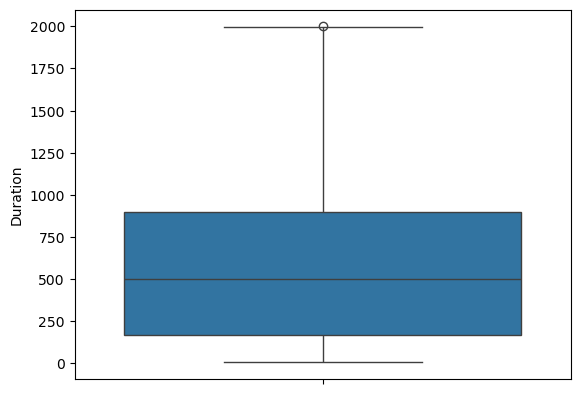

In [86]:
sns.boxplot(new_df['Duration'])

In [151]:
new_df.shape

(10388, 14)

# Lets remove the outlier for price column in the same way

In [88]:
# lower quantile
q1_Price = df['Price'].quantile(0.25)
#upper quantile
q3_Price = df['Price'].quantile(0.75)
print('q1:', q1_Price)
print('q3:', q3_Price)
print('IQR:', q3_Price - q1_Price)

q1: 5224.0
q3: 12343.5
IQR: 7119.5


In [89]:
IQR = q3_Price - q1_Price
IQR

7119.5

In [90]:
# calculating upper and lower limit now for Duration
outlier_lower_limit = q1_Price - 1.5*(IQR)
outlier_upper_limit = q3_Price + 1.5*(IQR)
print('Outlier_lower_limit:', outlier_lower_limit)
print('Outlier_upper_limit:', outlier_upper_limit)

Outlier_lower_limit: -5455.25
Outlier_upper_limit: 23022.75


# here also my outlier_lower_limt is -5455.25 which is mathematically right but not logically valid as flight prices cannot be in negative
# So I am ignoring the negative values in lower limit.

In [92]:

New_df_Price = df[(df['Price'] >= 0) & (df['Price'] <= outlier_upper_limit)]

<Axes: ylabel='Price'>

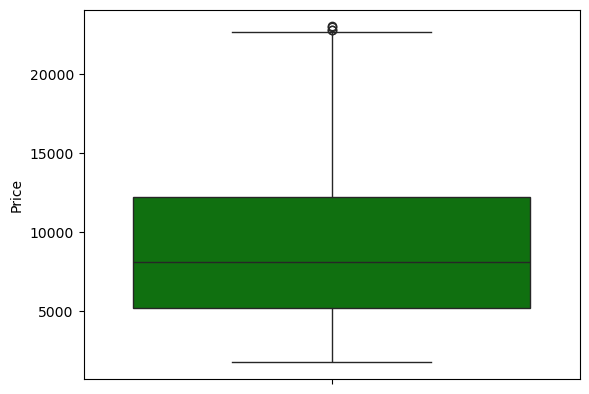

In [93]:
sns.boxplot(New_df_Price['Price'], color = 'g')

# There are still 2-3 outliers left even after applying IQR but we can neglect them as they will not impact our analysis

In [95]:
New_df_Price.head()
New_df_Price.shape

(10369, 14)

# lets check if there is skewness in price column of my original data by creating a histplot

Text(0.5, 1.0, 'Distribution of Flight Prices')

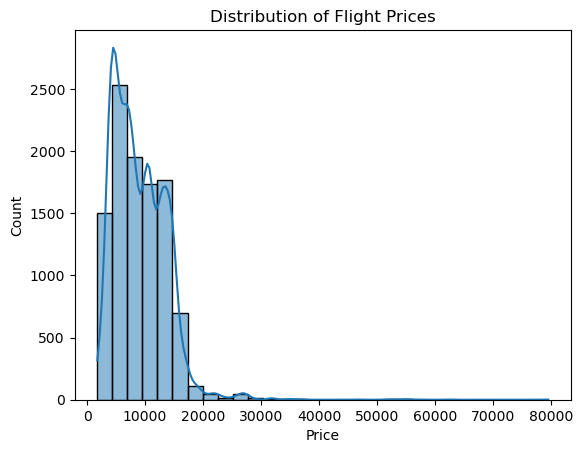

In [96]:
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribution of Flight Prices')

# observation from the upper distribution plot = Most flight prices lie between ₹3000 and ₹8000. 
# The distribution is right-skewed, indicating a few high-cost flights raising the upper end.

# Relationship between Duration and Price through scatterplot

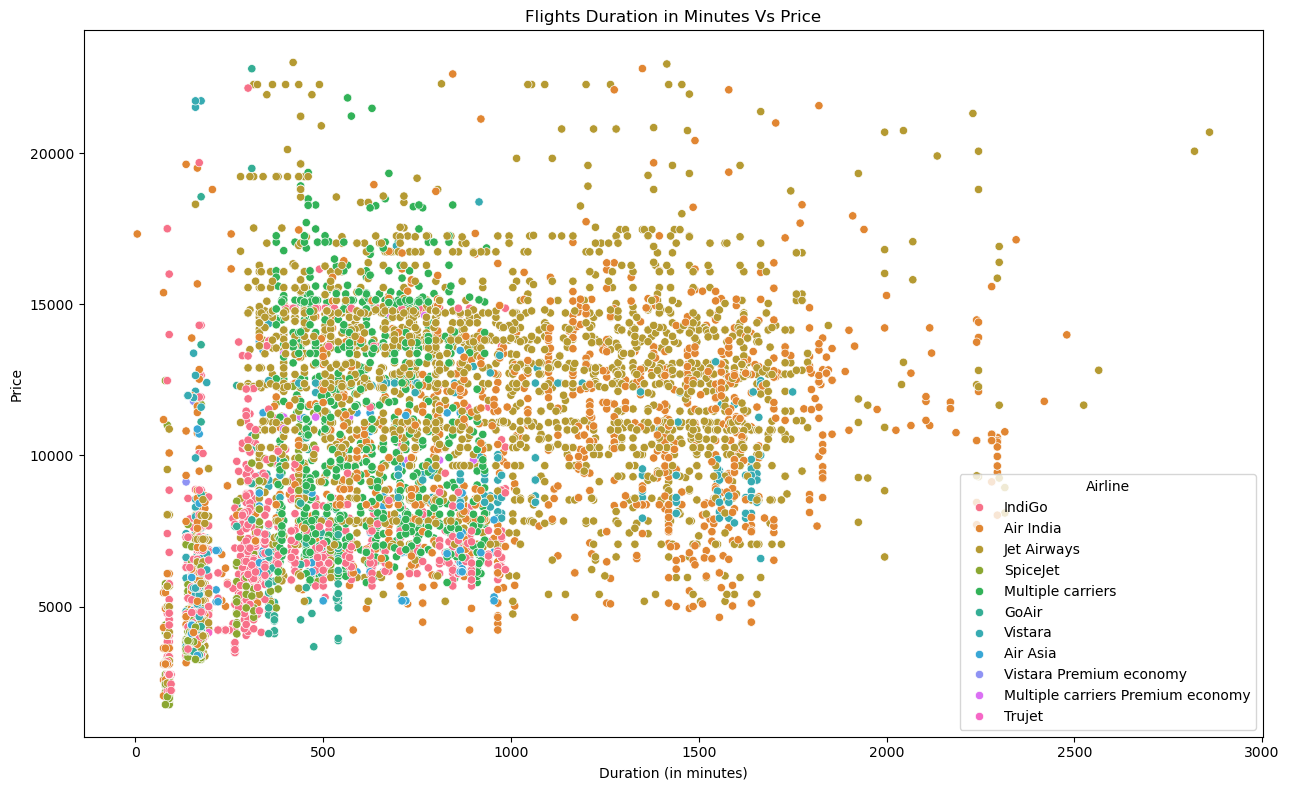

In [97]:

plt.figure(figsize=(13,8))
sns.scatterplot(x='Duration', y='Price',hue = 'Airline', data=New_df_Price)
plt.title('Flights Duration in Minutes Vs Price')
plt.xlabel('Duration (in minutes)')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# Insights from the scatterplot  --- Jet airways is operating at a very high scale
#                                --- flights are clustered between 250 min and 1000 mins

# Countplot of airplanes in each airline company

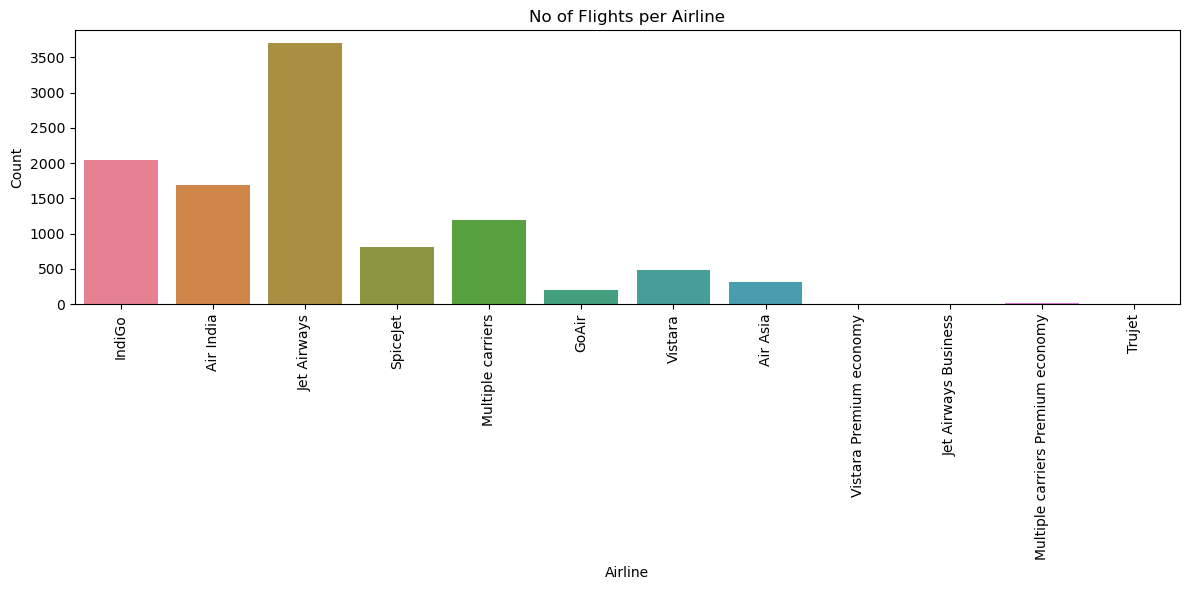

In [98]:


plt.figure(figsize=(12,6))
sns.countplot(x = 'Airline', data = df, palette = 'husl')
plt.title('No of Flights per Airline')
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



# Insights--- we can see from the upper countplot jet airways has the maximum no. of fleets among all the airlines

# Calculating average_price_per_airline using group by

In [163]:
average_price_per_airline = New_df_Price.groupby('Airline')['Price'].mean().reset_index()
average_price_per_airline

,Airline,Price
0,Air Asia,5590.260188
1,Air India,9401.778571
2,GoAir,5861.056701
3,IndiGo,5668.469897
4,Jet Airways,11303.035734
5,Multiple carriers,10750.907251
6,Multiple carriers Premium economy,11418.846154
7,SpiceJet,4312.584767
8,Trujet,4140.000000
9,Vistara,7801.355649


In [171]:
average_price_per_airline = average_price_per_airline.sort_values(by = 'Price', ascending = False)

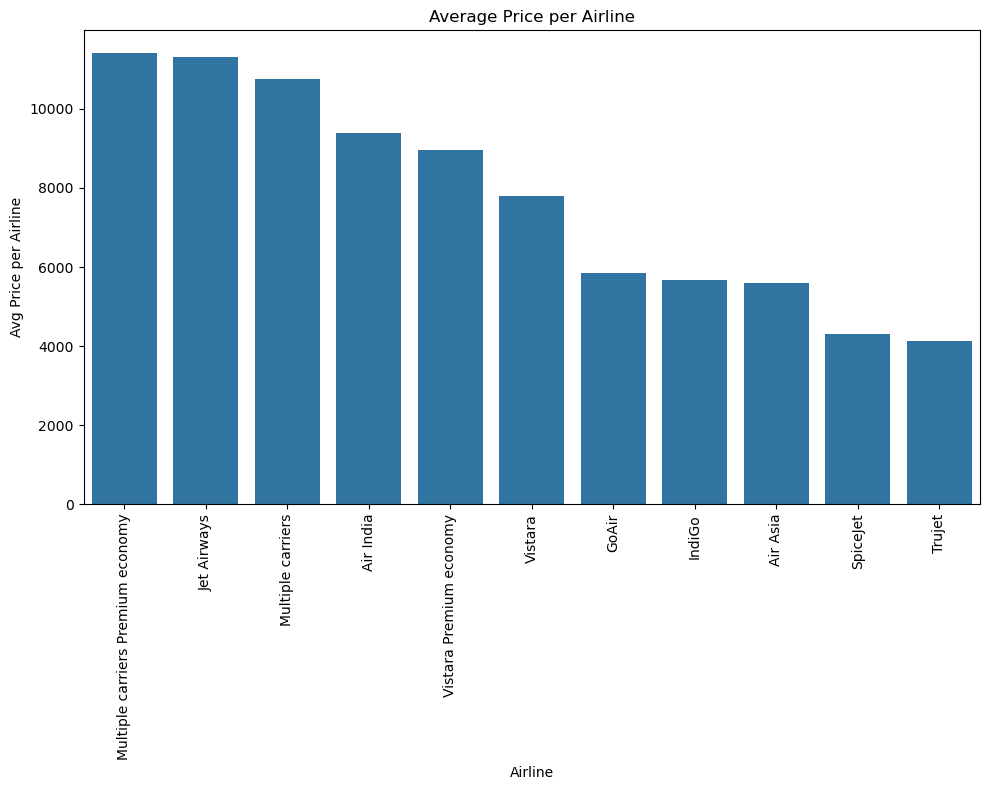

In [173]:
plt.figure(figsize=(10,8))
sns.barplot(x='Airline', y='Price', data = average_price_per_airline,ci=None)
plt.title('Average Price per Airline')
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Avg Price per Airline')
plt.tight_layout()
plt.show()

# I am creating a countplot using departure hour column to show how many flights depart at each hour of the day

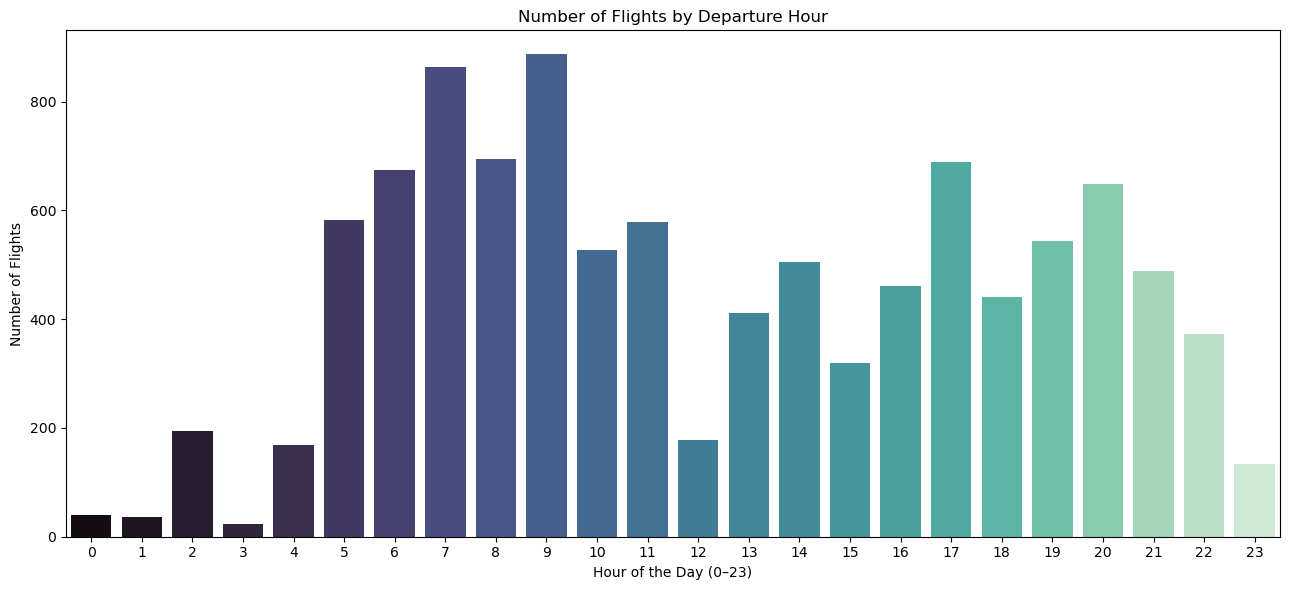

In [101]:
plt.figure(figsize=(13,6))
sns.countplot(x='Dep_Hour', data=df, palette='mako')
plt.title('Number of Flights by Departure Hour')
plt.xlabel('Hour of the Day (0–23)')
plt.ylabel('Number of Flights')
plt.tight_layout()
plt.show()

# insights--- from 5am to 9 pm is the first rush hour for airlines operations.